# Step By Step Supervised Learning

In this colaboratory notebook, you learn to work with python and machine learning models. and how to step by step develop machine learning project using Python.




Python Packages
 learn to load and use  machine learning packages in Python.




1.  **numpy**

  NumPy is a library for the Python programming language, adding support for large, **multi-dimensional arrays and matrices**, along with a large collection of high-level mathematical functions to operate on these arrays.
  
2.  **matplotlib**

  Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. 
  
3.  **pandas**

  pandas is an open source library providing high-performance, easy-to-use **data structures** and **data analysis tools** for the Python programming language.
  
4.  **sklearn**

  Scikit-learn (formerly scikits.learn) is a free software machine learning library for the Python programming language.
  
6.  **scipy**

  SciPy is a free and open-source Python library used for scientific computing and technical computing. 

### Import libraries
We need to import  all the modules, functions  before using them

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


To make sure that every single line will be  printed, even if they're in the same cell, we can use thf ollowing config:

In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Load Dataset

**Iris Data**

We want to use some data sets. 
We get start with the Iris dataset which usually is used to teach the fundamentals of machine learning algorithms.

Data set has been used by almost every data science beginner. This data set is the machine learning practitioner’s equivalent of “Hello, World!”.

Our goal is to train a machine learning model to correctly predict the flower species from the measured attributes.


**species**:

*   Iris Setosa
*   Iris Versicolor
*   Iris Virginica


**Variable**

Each species of flower is quantified via four numerical attributes, all measured in centimeters:

*   Sepal length
*   Sepal width
*   Petal length
*   Petal width



In [0]:
url = "https://raw.githubusercontent.com/FarnooshKh/Machine-Learning/master/Data/iris.csv"
dataset = pd.read_csv(url,index_col=0)

### Summarize the Dataset



*   Dimensions of the dataset.
*   Describtion of the dataset.

  Statistical summary of all attributes.
  
*   Class Distribution



In [0]:
# shape
print(dataset.shape)
iris_data = dataset.iloc[:,:-2]
iris_target = dataset['target']
dataset.head(5)

(150, 6)


sepal length (cm)  sepal width (cm)  ...  target        class
0                5.1               3.5  ...     0.0  Iris-setosa
1                4.9               3.0  ...     0.0  Iris-setosa
2                4.7               3.2  ...     0.0  Iris-setosa
3                4.6               3.1  ...     0.0  Iris-setosa
4                5.0               3.6  ...     0.0  Iris-setosa

[5 rows x 6 columns]

**Statistical Summary**

In [0]:
# descriptions

print(iris_data.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
count         150.000000        150.000000         150.000000        150.000000
mean            5.843333          3.057333           3.758000          1.199333
std             0.828066          0.435866           1.765298          0.762238
min             4.300000          2.000000           1.000000          0.100000
25%             5.100000          2.800000           1.600000          0.300000
50%             5.800000          3.000000           4.350000          1.300000
75%             6.400000          3.300000           5.100000          1.800000
max             7.900000          4.400000           6.900000          2.500000


In [0]:
iris_data.corr(method='pearson')

sepal length (cm)  ...  petal width (cm)
sepal length (cm)           1.000000  ...          0.817941
sepal width (cm)           -0.117570  ...         -0.366126
petal length (cm)           0.871754  ...          0.962865
petal width (cm)            0.817941  ...          1.000000

[4 rows x 4 columns]

In [0]:
# class distribution
print(dataset.groupby('class').size())
#dataset.groupby('class').describe()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [0]:
# datatype
dataset.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target               float64
class                 object
dtype: object

### Data Visualization





*   Univariate plots 

  Better understanding of each attribute.

  Plots of each individual variable.
  
  This gives us a much clearer idea of the distribution of the input attributes. For example if variable have Gaussian distribution then we can choose algorithms that use this assumption.
   
*   Multivariate plots 

  Better understand the relationships between attributes.
  
  Interactions between the variables.
  
  Correlation between variables








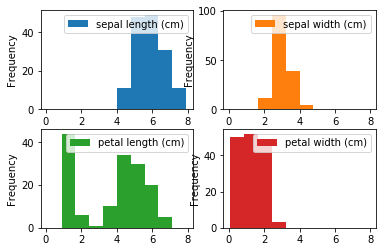

In [0]:
# two different ways of plots 
#dataset.iloc[:,:-2].hist(bins=20,figsize=(9,7),grid=False)
iris_data.plot(kind='hist', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

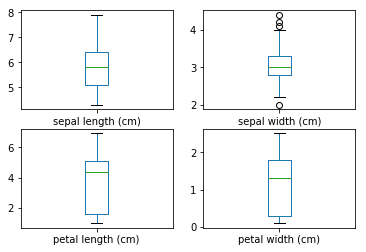

In [0]:
iris_data.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()


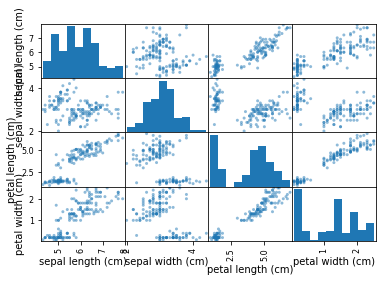

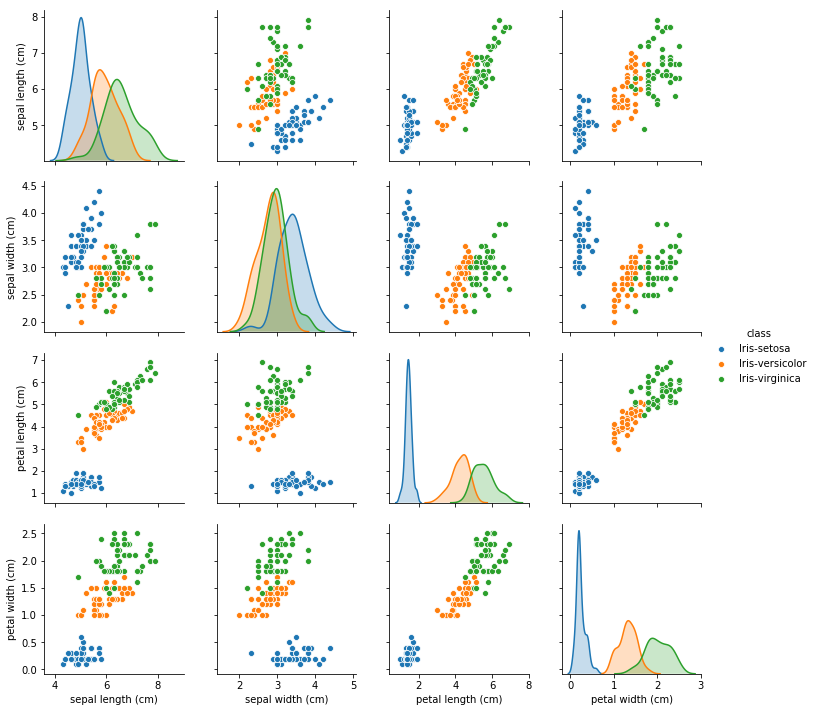

In [0]:
from pandas.plotting import scatter_matrix
import seaborn as sns
# scatter plot matrix
scatter_matrix(iris_data)
plt.show()


sns.pairplot(dataset.drop("target", axis=1), kind="scatter", hue="class")
plt.show()


# Building classification models
Among the available classification methods in Python, we focus on the following five to build classification models of tissue type of the cancer cell lines in our dataset:


*   Logistic regression
*   K- nearest neighbour
*   Naive Bayes
*   Random forest
*   Support vector machine



## Splitting data to training and testing sets

If we use one of our labeled fruit examples in the data that we use to train the classifier, we can't also use that same irish data as a test sample to also evaluate the classifier.

The machine learning Algorithm needs to work well on any input sample (Training Set), any new pieces of data that we might see in the future(Test Set).



To investigate performance of our model, we need to split the data to training and testing sets(validation set). This will help us to check potential overfitting in our model training.

**random_state** as the name suggests, is used for initializing the internal random number generator, which will decide the splitting of data into train and test indices in your case.

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_data, dataset['class'], test_size=0.30, random_state=5)


In [0]:
print(f'train: {X_train.size}')
print(f'test: {X_test.size}')

train: 420
test: 180


# Building classification models




## K nearest neighbour(KNN)
K nearest neighbour uses a distance metric like Euclidean distance to identity similarity of target data point (sample) in test or validation set to the data points (samples) in the trainign set. Then based on the user specified k, it finds the k closest points (samples) to the target data point. Afterward, it chooses the most frequent label among the k closes points (majority voting) as the class label of the target sample. The class labels can be also assigned based on weighted voting of the k closest data points to the data point.

In [0]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize our classifier
knn = KNeighborsClassifier(n_neighbors=2, weights='distance' )

# Fitting the model with the data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='distance')

In [0]:
y_pred = knn.predict(X_test)
print(y_pred)
print(y_test.values)


['Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor']
['Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 

# Performance measure

To assess performance of the machine learning model, we can use the following measure of the performance of the model:



* **precision** is also referred to as positive predictive value (PPV)

$${\displaystyle {\text{Precision}}=\text{True positive rate} = {\frac {tp}{tp+fp}}\,}$$

* **Recall** in this context is also referred to as the true positive rate or sensitivity




$${\displaystyle {\text{Recall}}={\frac {tp}{tp+fn}}\,} $$

 

* **specificity** True negative rate



$${\displaystyle {\text{True negative rate}}={\frac {tn}{tn+fp}}\,}$$

* **Accuracy**: This measure gives you a sense of performance for all the classes together as follows:

$$ {\displaystyle {\text{Accuracy}}={\frac {tp+tn}{tp+tn+fp+fn}}\,}$$


\begin{equation*} Accuracy=\frac{Number\:of\:correct\:predictions}{(Total\:number\:of\:data\:points (samples))} \end{equation*}

$${\displaystyle {\text{Balanced Accuracy}}={\frac {TPR+TNR}{2}}\,}$$

* **Confusion matrix (or error matrix)**: True and false classification of the samples in all the classes can be shown in a matrix which is called confusion (or error) matrix. The columns are usually considered as the predicted classes and rows as actual classes. Hence, the diagonal elements of the matrix will be the total number of true classifcation in each class. 


In [0]:
from sklearn import metrics

print("Confusion matrix of the predictions:\n", metrics.confusion_matrix(y_test, y_pred))

print("accuracy of the predictions:", metrics.accuracy_score(y_test, y_pred))
print("precision", metrics.precision_score(y_test, y_pred, average=None))


Confusion matrix of the predictions:
 [[15  0  0]
 [ 0 14  2]
 [ 0  1 13]]
accuracy of the predictions: 0.9333333333333333
precision [1.         0.93333333 0.86666667]


In [0]:
print("accuracy of the predictions:", metrics.accuracy_score(y_test, y_pred))
print("blanced accuracy of the predictions:", metrics.balanced_accuracy_score(y_test, y_pred))
print("MCC of the predictions:", metrics.matthews_corrcoef(y_test, y_pred))
print("Confusion matrix of the predictions:", metrics.confusion_matrix(y_test, y_pred))

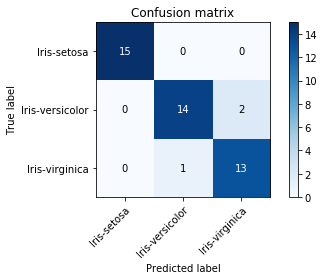

In [0]:


from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


def plot_confusion_matrix(y_true, y_pred, classes,
                          title=None,
                          cmap=plt.cm.Blues):
 
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax



# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes= dataset['class'].unique(),
                      title='Confusion matrix')

plt.show()


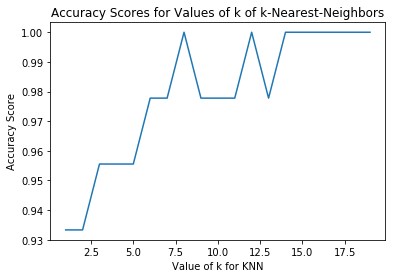

In [0]:
k_range = list(range(1,20))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

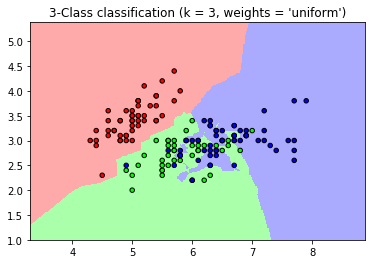

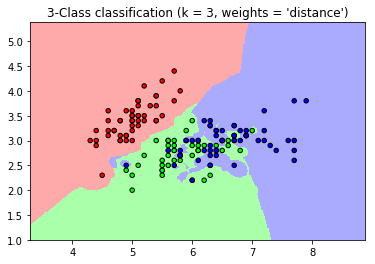

In [0]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 3

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()


## breast_cancer DataSet


The breast cancer dataset is a classic and easy to use binary classification dataset.

>-   |  -
>---|---
> Classes	| 2
> Samples per class	|212(M),357(B)
> Samples total	|569
> Dimensionality	|30
> Features | 	real, positive



 **data : Bunch**

Dictionary-like object, 
*  the interesting attributes are: ‘data’
*  the data to learn, ‘target’, 
*  the classification labels, ‘target_names’
*  the meaning of the labels, ‘feature_names’
*  the meaning of the features, and ‘DESCR’, the full description of the dataset
*  ‘filename’, the physical location of breast cancer csv dataset (added in version 0.20).


#### load data from sklearn data sets

scikit-learn - the machine learning algorithms used for data analysis and data mining tasks




In [0]:
from sklearn.datasets import load_breast_cancer
breast_data = load_breast_cancer()

Let's check the shapes of the dataframes:

In [0]:

breast_data.data.shape
breast_data.target.shape
list(breast_data.target_names)


['malignant', 'benign']

## Splitting data to training and testing sets

To investigate performance of our model, we need to split the data to training and testing sets. This will help us to check potential overfitting in our model training.

**random_state** as the name suggests, is used for initializing the internal random number generator, which will decide the splitting of data into train and test indices in your case.

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(breast_data.data, breast_data.target, test_size=0.30, random_state=5)




# Building classification models

Among the available classification methods in Python, we focus on the following five to build classification models in our dataset:

* Logistic regression
* K- nearest neighbour
* Naive Bayes
* **Random forest**
* Support vector machine

## Logistic regression
If we have set of features X1 to Xn, y can be obtained as:
\begin{equation*} y=b0+b1X1+b2X2+...+bnXn\end{equation*}

where y is the predicted value obtained by weighted sum of the feature values.

Then probability of each class (for example tissue class BREAST) can be obtained using the logistic function 

\begin{equation*} p(class=BREAST)=\frac{1}{(1+exp(-y))} \end{equation*}

Based on the given class labels and the features given in the trainign data, coefficients b0 to bn can be ontained during the optimization process.

b0 to bn are fixed for all samples while X1 to Xn are feature values specific to each sample. Hence, the logistic function will give us probability of each class assigned to each sample. Finally, the model will choose the class with the highest probability for each sample.


**Note.** The logistic regression model is parametric and the parameters are the regression coefficiets b0 to bn.


In [0]:
from sklearn.linear_model import LogisticRegression as LR

# Initialize our classifier
#logreg = LogisticRegression()
logreg = LR()

# Fitting the model with the data
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1])

In [0]:
from sklearn import metrics

print("accuracy of the predictions:", metrics.accuracy_score(y_test, y_pred))
print("blanced accuracy of the predictions:", metrics.balanced_accuracy_score(y_test, y_pred))
print("MCC of the predictions:", metrics.matthews_corrcoef(y_test, y_pred))
print("Confusion matrix of the predictions:", metrics.confusion_matrix(y_test, y_pred))
print("Confusion matrix of the predictions:\n", metrics.confusion_matrix(y_test, y_pred))


accuracy of the predictions: 0.9824561403508771
blanced accuracy of the predictions: 0.9790611028315946
MCC of the predictions: 0.9617120354193177
Confusion matrix of the predictions: [[ 59   2]
 [  1 109]]
Confusion matrix of the predictions:
 [[ 59   2]
 [  1 109]]


In [0]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize our classifier
knn = KNeighborsClassifier(n_neighbors=20)

# Fitting the model with the data
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [0]:
from sklearn import metrics

print("accuracy of the predictions:", metrics.accuracy_score(y_test, y_pred))
print("blanced accuracy of the predictions:", metrics.balanced_accuracy_score(y_test, y_pred))
print("MCC of the predictions:", metrics.matthews_corrcoef(y_test, y_pred))
print("Confusion matrix of the predictions:", metrics.confusion_matrix(y_test, y_pred))
print("Confusion matrix of the predictions:\n", metrics.confusion_matrix(y_test, y_pred))


accuracy of the predictions: 0.9824561403508771
blanced accuracy of the predictions: 0.9790611028315946
MCC of the predictions: 0.9617120354193177
Confusion matrix of the predictions: [[ 59   2]
 [  1 109]]
Confusion matrix of the predictions:
 [[ 59   2]
 [  1 109]]


# Naive Bayes
To understand Naive Bayes algotirhm, we need to know what Bayes theorem. Bayes theorem related conditional rpobabilities as follows:

\begin{equation*} p(A|B)p(B)=p(B|A)p(A) \end{equation*}
that can be rewritten as

\begin{equation*} p(A|B)=\frac{p(B|A)p(A)}{p(B)} \end{equation*}

where p(A) and p(B) are probabilities of events A and B, respectively. p(A|B) and p(B|A) are also conditional probabilities of A given B and B given A, respectively.
**Example without numbers**

Now let's assume we have 3 features X1, X2 and X3 and we want to identify the probability of class C for sample A with feature values *x1*, *x2* and *x3*:

\begin{equation*} p(class=C|X1=x1, X2=x2 , X3=x3)=\frac{p(X1=x1|class=C)p(X2=x2|lass=C)p(X3=x3|class=C)p(class=C)}{p(X1=x1)p(X2=x2)p(X3=x3)} \end{equation*}

where 
\begin{equation*} p(X1=x1, X2=x2 , X3=x3)=p(X1=x1)p(X2=x2)p(X3=x3) \end{equation*}
and
\begin{equation*} p(X1=x1, X2=x2 , X3=x3|class=C)=p(X1=x1|class=C)p(X2=x2|class=C)p(X3=x3|lass=C)p(class=C) \end{equation*}

as the features are independent variables. 

**Real life example with numbers**
We want to know the chance of having breast cancer if the diagnosis test is positive for a woman with the age between 40 and 60. This example is mainly for understanding Bayes theorem not Naive Bayes classifier. In case of Naive Bayes algorithm, this process can be easily extended to multiple features as described in the above example.

***Assumptions (not necessarily correct)***
* 2% of women between 40 and 60 have breast cancer
* True positive rate is 95% (if a woman has breast cancer, it will be diagnosed with 95% probability). Therefore, 5% of the time the women without breast cancer will be diagnosed positively by the test.

Now the question is *What is the chance of havign breast cancer if a woman has positive result from a diagnosis test?*

\begin{equation*} p(having \quad breast \quad cancer|positive)=\frac{p(positive|breast \quad cancer)p(breast cancer)}{p(positive)} \end{equation*}

where 


\begin{equation*} p(positive) = p(positive|having \quad breast \quad cancer)p(having \quad breast \quad cancer) \\+ p(positive|not \quad having \quad breast \quad cancer)p(not \quad having \quad breast \quad cancer)\\=
0.95*0.02+0.05*0.98\\=0.068\end{equation*}

Therefore,

\begin{equation*} p(having \quad breast  \quad cancer|positive)=\frac{p(positive|breast \quad cancer)p(having \quad breast \quad cancer)}{p(positive)}\\= \frac{0.95*0.02}{0.068}\\=0.28\end{equation*}


As we can see, there is only 28% chance of having cancer upon positive test result. Although the numbers were not clinically valid numbers, we deal with similar results in disease diagnosis. This is one of the reasons that further checkups by phycisions are mandatory upon positive results. Do not panic when you have a positive result but follow up with your doctor immediately.

**Note.** Naive Bayes classifier is called ***Naive*** as it assumes each feature will independently contribute in prediction of a class for each data point (sample).

In [0]:
from sklearn.naive_bayes import GaussianNB

# Initialize our classifier
gnb = GaussianNB()

# Train our classifier
model = gnb.fit(X_train, y_train)

In [0]:
y_pred = model.predict(X_test)
print(y_pred)

[0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0
 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1
 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1
 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0
 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1]


In [0]:
model.predict_proba(X_train)

array([[9.99686848e-001, 3.13151653e-004],
       [3.47869614e-014, 1.00000000e+000],
       [9.46348993e-001, 5.36510068e-002],
       [2.80943521e-017, 1.00000000e+000],
       [2.15893056e-011, 1.00000000e+000],
       [1.66479840e-014, 1.00000000e+000],
       [3.98589687e-001, 6.01410313e-001],
       [4.35763926e-018, 1.00000000e+000],
       [1.00000000e+000, 3.70581487e-036],
       [3.27971845e-011, 1.00000000e+000],
       [2.86252434e-012, 1.00000000e+000],
       [1.17832068e-011, 1.00000000e+000],
       [1.00000000e+000, 1.40806536e-010],
       [8.00477698e-007, 9.99999200e-001],
       [1.00000000e+000, 1.13351940e-058],
       [1.92405753e-014, 1.00000000e+000],
       [1.63510186e-012, 1.00000000e+000],
       [2.63745895e-013, 1.00000000e+000],
       [1.00000000e+000, 3.13265160e-018],
       [1.15002441e-010, 1.00000000e+000],
       [1.00000000e+000, 1.19316546e-016],
       [1.34334949e-001, 8.65665051e-001],
       [1.01974845e-017, 1.00000000e+000],
       [1.0

In [0]:
print("accuracy of the predictions:", metrics.accuracy_score(y_test, y_pred))
print("blanced accuracy of the predictions:", metrics.balanced_accuracy_score(y_test, y_pred))
print("MCC of the predictions:", metrics.matthews_corrcoef(y_test, y_pred))
print("Confusion matrix of the predictions:", metrics.confusion_matrix(y_test, y_pred))

accuracy of the predictions: 0.9532163742690059
blanced accuracy of the predictions: 0.9490312965722802
MCC of the predictions: 0.8980625931445604
Confusion matrix of the predictions: [[ 57   4]
 [  4 106]]


In [0]:
gnb = GaussianNB()

# Fitting the model with the data
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Testing the model on the testing set:

In [0]:
y_pred = model.predict(X_test)
print(y_pred)

[0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0
 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1
 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1
 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0
 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1]


In [0]:
print("accuracy of the predictions:", metrics.accuracy_score(y_test, y_pred))
print("blanced accuracy of the predictions:", metrics.balanced_accuracy_score(y_test, y_pred))
print("MCC of the predictions:", metrics.matthews_corrcoef(y_test, y_pred))
print("Confusion matrix of the predictions:", metrics.confusion_matrix(y_test, y_pred))

accuracy of the predictions: 0.9532163742690059
blanced accuracy of the predictions: 0.9490312965722802
MCC of the predictions: 0.8980625931445604
Confusion matrix of the predictions: [[ 57   4]
 [  4 106]]


In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
RFclf = RandomForestClassifier(max_depth=2, random_state=0)
RFclf.fit(X_train, y_train)
y_pred = RFclf.predict(X_test)
print(RFclf.feature_importances_)

[0.00761426 0.00673364 0.02849989 0.         0.01440921 0.
 0.13006328 0.16576521 0.         0.         0.05365154 0.
 0.00604721 0.19879241 0.         0.00508625 0.00178497 0.
 0.         0.00715387 0.0190407  0.         0.02731024 0.08402373
 0.00944064 0.         0.00700175 0.20679124 0.         0.02078996]


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
;p0;'''swqprint("accuracy of the predictions:", metrics.accuracy_score(y_test, y_pred))
print("blanced accuracy of the predictions:", metrics.balanced_accuracy_score(y_test, y_pred))
print("MCC of the predictions:", metrics.matthews_corrcoef(y_test, y_pred))
print("Confusion matrix of the predictions:", metrics.confusion_matrix(y_test, y_pred))
print("Confusion matrix of the predictions:\n", metrics.confusion_matrix(y_test, y_pred))


accuracy of the predictions: 0.9473684210526315
blanced accuracy of the predictions: 0.9481371087928465
MCC of the predictions: 0.8871974560470782
Confusion matrix of the predictions: [[ 58   3]
 [  6 104]]
Confusion matrix of the predictions:
 [[ 58   3]
 [  6 104]]


### Load Dataset

**diabetes**


Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

>-  |  -
>---|---
> Samples total	|442
> Dimensionality	|10
> Target Features | 	real, -.2 < x < .2




 **data : Bunch**

Dictionary-like object, the interesting attributes are: ‘data’, the data to learn, ‘target’, the regression target for each sample, ‘data_filename’, the physical location of diabetes data csv dataset, and ‘target_filename’, the physical location of diabetes targets csv datataset (added in version 0.20).

(data, target) : tuple if return_X_y is True





In [0]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]
diabetes_df = pd.DataFrame(data= np.c_[diabetes['data'], diabetes['target']],
                     columns= diabetes['feature_names'] + ['target'])


### Summarize the Dataset



*   Dimensions of the dataset.
*   Describtion of the dataset.

  Statistical summary of all attributes.
  
*   Class Distribution



In [0]:
# shape
print(diabetes_df.shape)


(442, 11)


**Statistical Summary**

In [0]:
# descriptions

print(diabetes_df[['age']].describe())

                age
count  4.420000e+02
mean  -3.634285e-16
std    4.761905e-02
min   -1.072256e-01
25%   -3.729927e-02
50%    5.383060e-03
75%    3.807591e-02
max    1.107267e-01


In [0]:
# datatype
diabetes_df.dtypes

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

In [0]:
diabetes_df.corr(method='pearson')

age       sex       bmi  ...        s5        s6    target
age     1.000000  0.173737  0.185085  ...  0.270777  0.301731  0.187889
sex     0.173737  1.000000  0.088161  ...  0.149918  0.208133  0.043062
bmi     0.185085  0.088161  1.000000  ...  0.446159  0.388680  0.586450
bp      0.335427  0.241013  0.395415  ...  0.393478  0.390429  0.441484
s1      0.260061  0.035277  0.249777  ...  0.515501  0.325717  0.212022
s2      0.219243  0.142637  0.261170  ...  0.318353  0.290600  0.174054
s3     -0.075181 -0.379090 -0.366811  ... -0.398577 -0.273697 -0.394789
s4      0.203841  0.332115  0.413807  ...  0.617857  0.417212  0.430453
s5      0.270777  0.149918  0.446159  ...  1.000000  0.464670  0.565883
s6      0.301731  0.208133  0.388680  ...  0.464670  1.000000  0.382483
target  0.187889  0.043062  0.586450  ...  0.565883  0.382483  1.000000

[11 rows x 11 columns]

## Splitting data to training and testing sets

To investigate performance of our model, we need to split the data to training and testing sets(validation set). This will help us to check potential overfitting in our model training.

**random_state** as the name suggests, is used for initializing the internal random number generator, which will decide the splitting of data into train and test indices in your case.

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes.target, test_size=0.20, random_state=5)


# Building regression models




## Regression Model

In [0]:
from sklearn.linear_model import LinearRegression

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
print(y_pred)


[171.27316713 223.87670856 112.5999863  144.97139641 191.50529845
 128.78569136 143.95978985 221.85349543 157.1106752  203.64457724
  72.13572366 198.58654441 148.00621611 148.00621611 207.69100351
 131.82051105 138.90175702  97.42588781  92.36785498 115.634806
 112.5999863  129.79729792 130.80890449 184.42405249 122.71605196
 102.48392064 280.52667626 212.74903634 129.79729792 134.85533075
 129.79729792 119.68123226 129.79729792 130.80890449 150.02942924
 139.91336358 208.70261007 150.02942924 167.22674087  79.21696962
 100.46070751 142.94818328 239.05080705 131.82051105 140.92497015
 125.75087166 216.7954626   91.35624841 183.41244592 140.92497015
 231.96956109 132.83211762 227.92313483 218.81867573 202.63297068
 120.69283883 127.77408479  83.26339588 188.47047875 194.54011815
 108.55356003 170.26156056 134.85533075 156.09906864 136.87854388
 211.73742977 215.78385604 151.04103581 188.47047875 157.1106752
 165.20352773 169.249954   167.22674087 153.06424894 170.26156056
 155.08746207

# Performance measure

Mean Absolute Error (MAE) and  Mean squared error (MSE) are two of the most common metrics used to measure accuracy for continuous variables. 

Mean Absolute Error (MAE)


$\text{MAE}(y, \hat{y}) = \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}}-1} \left| y_i - \hat{y}_i \right|$ 


Mean squared error (MSE)


$\text{MSE}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (y_i - \hat{y}_i)^2$



Coefficients: 
 [938.57416386]
Mean squared error: 4391.82
Mean absolute error: 55.51


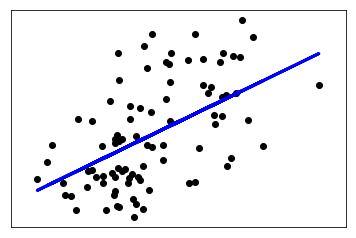

In [0]:
from sklearn import metrics

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % metrics.mean_squared_error(y_test, y_pred))
print("Mean absolute error: %.2f"
      % metrics.mean_absolute_error(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [0]:

X_train, X_test, y_train, y_test = train_test_split(diabetes_df[diabetes['feature_names']], diabetes.target, test_size=0.30, random_state=5)


In [0]:
# Train the model using the training sets
regr.fit(X_train, y_train)
# Make predictions using the testing set
y_pred = regr.predict(X_test)

In [0]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % metrics.mean_squared_error(y_test, y_pred))
print("Mean absolute error: %.2f"
      % metrics.mean_absolute_error(y_test, y_pred))




Coefficients: 
 [ -51.76984412 -216.33429332  518.58866586  330.65098157 -592.75657301
  406.11524251    8.72139263  123.00344652  700.50136883    5.56790133]
Mean squared error: 3121.97
Mean absolute error: 45.48
